In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import numpy as np

In [54]:
data = pd.read_csv('Faculty.csv')
data.head()

,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,EthnicityLabel1,EthnicityLabel2,...,NationalityLabel1,NationalityLabel2,NationalityLabel3,NationalityValue3,NationalityValue2,NationalityValue1,states,public,institute_rank,institution_rank
0,Princeton University,4.7,good,Art History,Al,Acres,NaN,11,White,Black,...,CelticEnglish,"Muslim,Nubian","African,EastAfrican",0.1595,0.2614,0.3219,NJ,False,1,1
1,Princeton University,1.8,poor,Economics,Alicia,Adsera,NaN,3,White,Hispanic,...,"Hispanic,Spanish",CelticEnglish,"European,French",0.0579,0.0695,0.7500,NJ,False,1,1
2,Princeton University,5.0,good,Engineering,Ilhan,Aksay,NaN,1,White,Black,...,"Muslim,Turkic,Turkey","European,German",CelticEnglish,0.0109,0.0593,0.9056,NJ,False,1,1
3,Princeton University,4.5,good,Languages,Kun,An,NaN,2,API,White,...,"EastAsian,Indochina,Vietnam","EastAsian,Malay,Indonesia","European,German",0.0102,0.0227,0.9240,NJ,False,1,1
4,Princeton University,4.8,good,English,Sarah,Anderson,NaN,2,White,Black,...,CelticEnglish,"European,German","European,French",0.0086,0.0122,0.9539,NJ,False,1,1


In [55]:
# Creating a dictionary of universities af their respective ranks
univ_rank = {}
rank = 1
for univ in data.institution_name.unique():
    univ_rank[univ] = rank
    rank += 1

### Creating a DataFrame of Department vs Nationality count

In [56]:
top_100_dept = list(data.tDept.value_counts().index)[:30]
top_100_dept_data = data[data['tDept'].isin(top_100_dept)]
nat_labels = list(data.NationalityLabel1.unique())
nat = pd.crosstab(top_100_dept_data.tDept,top_100_dept_data.NationalityLabel1).reset_index()
del nat.columns.name
top_15_nat = nat.sum()[1:].sort_values(ascending=False)[:15].index
nat = nat.set_index(['tDept'])
nat = nat.loc[:,nat_labels]
nat.head()

,CelticEnglish,"Hispanic,Spanish","Muslim,Turkic,Turkey","EastAsian,Indochina,Vietnam","European,French",SouthAsian,"Muslim,Pakistanis,Pakistan","Hispanic,Portuguese","European,Russian","European,German",...,"European,SouthSlavs","EastAsian,Malay,Malaysia","Nordic,Finland","African,SouthAfrican","EastAsian,Indochina,Myanmar","Muslim,Pakistanis,Bangladesh","EastAsian,Indochina,Thailand","Muslim,Turkic,CentralAsian","Muslim,Maghreb","EastAsian,Indochina,Cambodia"
tDept,,,,,,,,,,,,,,,,,,,,,
Accounting,1464,63,14,13,73,96,3,27,5,189,...,1,1,0,1,0,3,0,0,0,0
Anthropology,2419,228,16,5,130,89,10,68,7,317,...,6,0,2,2,0,1,0,0,0,0
Biology,3699,259,13,18,218,162,9,85,26,567,...,8,3,7,6,1,9,1,0,0,0
Business,3157,160,44,19,172,261,9,90,20,407,...,12,1,5,4,0,7,3,0,0,0
Chemistry,3192,229,17,43,223,223,11,81,62,529,...,15,3,3,3,1,10,1,1,0,0


In [57]:
#Defining colors for graphs
colList1 = ["#ADD8E6","#af5dd2","#9fb333","#6565d5","#d69633","#FFC107","#d85532","#3dbbb8","#d74164","#FFEA00","#cb4a9f","#487a3a","#86539c","#acae60","#d08fd2","#82702b","#5ea1d6","#a95335","#b7607a","#df946e"]
#reference: http://tools.medialab.sciences-po.fr/iwanthue/
s = pd.Series(colList1)

## Understanding the ethnicity and nationality distribution across all departments

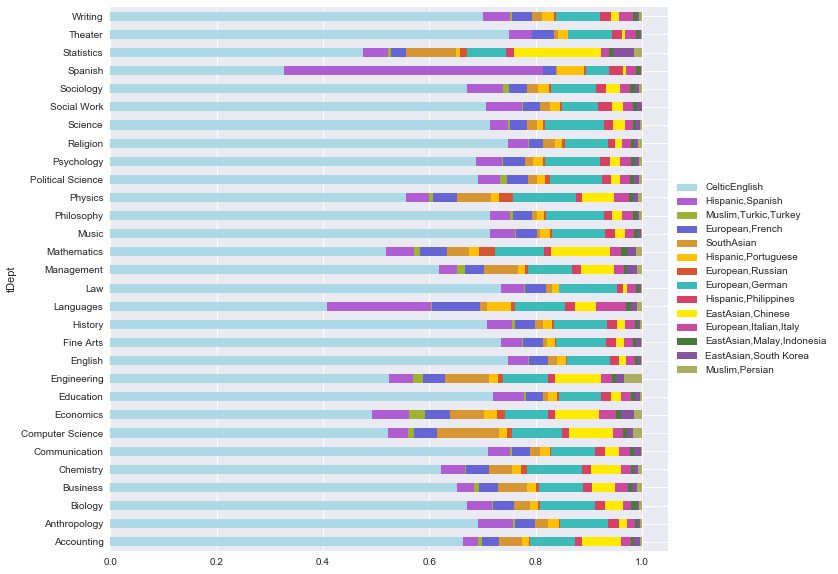

In [58]:
l = []
for col in nat.columns:
    if nat[col].sum()<1000:
        l.append(col)

nat1 = nat
nat1.drop(l, axis=1, inplace=True)
nat1 = nat1.apply(lambda x: x/x.sum(), axis=1)
nat1.plot.barh(stacked=True, color = s.sort_index().values)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.legend(loc='center left', bbox_to_anchor = (1.0,0.5))
plt.show()

## Understanding the ethnicity and nationality distribution across all Universities

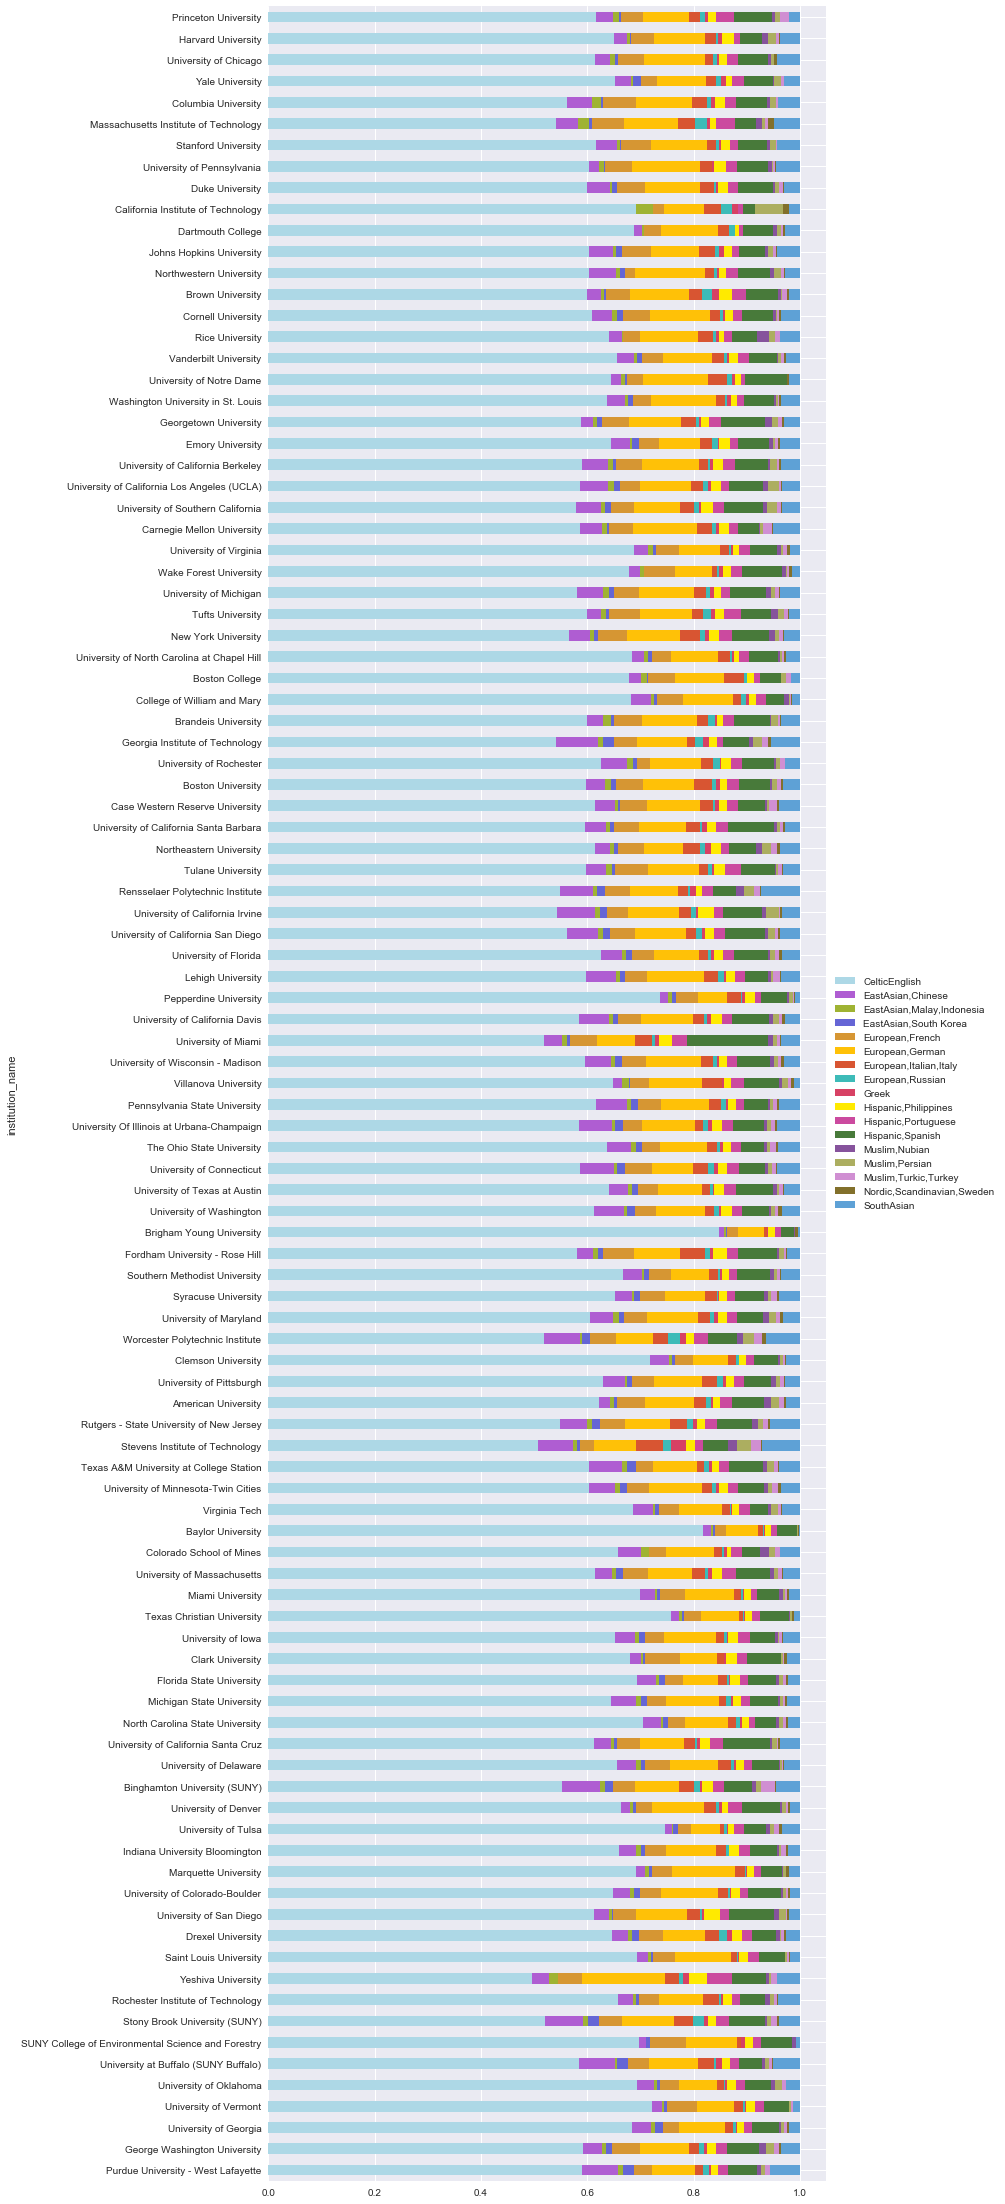

In [59]:
univ_nat = pd.crosstab(data.institution_name,data.NationalityLabel1).reset_index()
del univ_nat.columns.name
#univ_nat = univ_nat.drop('White', 1)

univ_nat['institution_rank'] = univ_nat['institution_name'].map(univ_rank)
univ_nat = univ_nat.sort_values(by = ['institution_rank'],ascending=False)
univ_nat = univ_nat.set_index(['institution_name'])
#univ_nat = univ_nat.apply(lambda x: x/x.sum(), axis=1)
#univ_nat = univ_nat.loc[:,list(data.NationalityLabel1.unique())]

l1 = []
for col in univ_nat.columns:
    if univ_nat[col].sum()<1000:
        l1.append(col)
l1 = l1[:-1]
l1.append('institution_rank')

univ_nat1 = univ_nat
univ_nat1.drop(l1, axis=1, inplace=True)
univ_nat1 = univ_nat1.apply(lambda x: x/x.sum(), axis=1)

univ_nat1.plot.barh(stacked=True, color = s.sort_index().values)
fig = plt.gcf()
fig.set_size_inches(10,40)
plt.legend(loc='center left', bbox_to_anchor = (1.0,0.5))
plt.show()

## Understanding the ethnicity distribution across universities

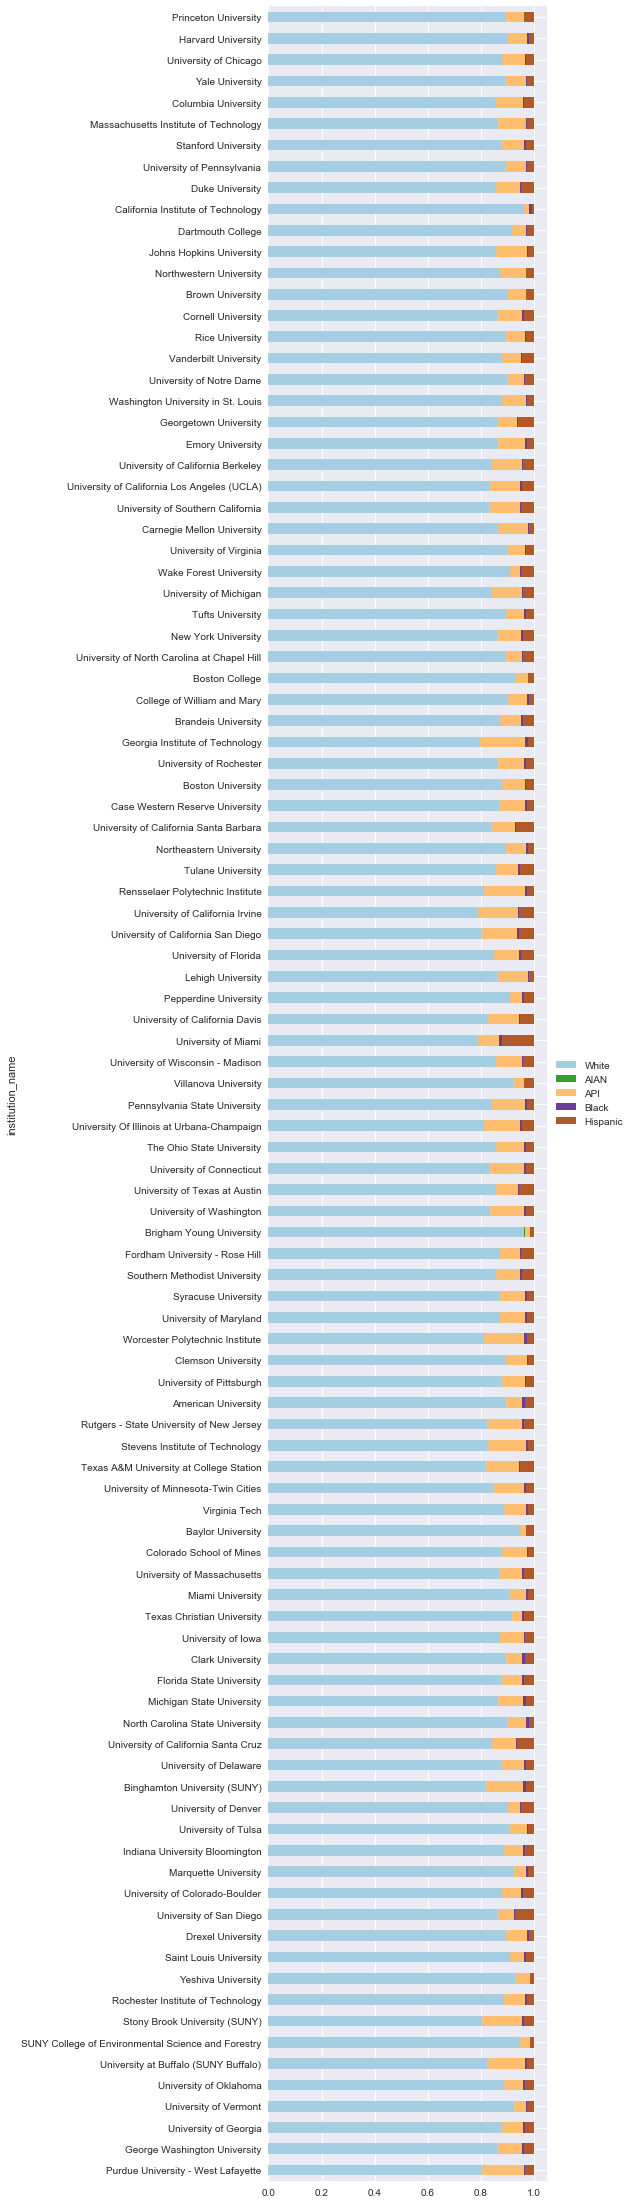

In [60]:
eth = pd.crosstab(data.institution_name,data.EthnicityLabel1).reset_index()
del eth.columns.name
eth['institution_rank'] = eth['institution_name'].map(univ_rank)
eth = eth.sort_values(by = ['institution_rank'],ascending=False)
eth = eth.set_index(['institution_name'])
eth = eth.loc[:,['White','AIAN','API','Black','Hispanic']]
eth = eth.apply(lambda x: x/x.sum(), axis=1)
eth.plot.barh(stacked=True,colormap='Paired')
fig = plt.gcf()
fig.set_size_inches(5,40)
plt.legend(loc='center left', bbox_to_anchor = (1.0,0.5))
plt.show()

# University Profiling:

In [61]:
uname = 'Princeton University'
pu = data[data['institution_name'] == uname]
pu.head()

,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,EthnicityLabel1,EthnicityLabel2,...,NationalityLabel1,NationalityLabel2,NationalityLabel3,NationalityValue3,NationalityValue2,NationalityValue1,states,public,institute_rank,institution_rank
0,Princeton University,4.7,good,Art History,Al,Acres,NaN,11,White,Black,...,CelticEnglish,"Muslim,Nubian","African,EastAfrican",0.1595,0.2614,0.3219,NJ,False,1,1
1,Princeton University,1.8,poor,Economics,Alicia,Adsera,NaN,3,White,Hispanic,...,"Hispanic,Spanish",CelticEnglish,"European,French",0.0579,0.0695,0.7500,NJ,False,1,1
2,Princeton University,5.0,good,Engineering,Ilhan,Aksay,NaN,1,White,Black,...,"Muslim,Turkic,Turkey","European,German",CelticEnglish,0.0109,0.0593,0.9056,NJ,False,1,1
3,Princeton University,4.5,good,Languages,Kun,An,NaN,2,API,White,...,"EastAsian,Indochina,Vietnam","EastAsian,Malay,Indonesia","European,German",0.0102,0.0227,0.9240,NJ,False,1,1
4,Princeton University,4.8,good,English,Sarah,Anderson,NaN,2,White,Black,...,CelticEnglish,"European,German","European,French",0.0086,0.0122,0.9539,NJ,False,1,1


In [62]:
#ax1

pu1 = pu.EthnicityLabel1.value_counts().to_frame()
pu1 = pu1.transpose()

#ax2
pu2 = pu.NationalityLabel1.value_counts().to_frame()
pu2 = pu2.transpose()

#ax3
import math
pu3 = pu.groupby('EthnicityLabel1').mean()

#ax4

pu4 = pd.DataFrame(pu.tDept.value_counts()).reset_index()
pu4.rename(columns={'index': 'dept', 'tDept': 'faculty'}, inplace=True)

departments = pu4.dept.unique()
natCount = [pu[pu['tDept'] == dept].NationalityLabel1.nunique() for dept in departments]
pu4['nationality_count'] = natCount

ethCount = [pu[pu['tDept'] == dept].EthnicityLabel1.nunique() for dept in departments]
pu4['ethnicity_count'] = ethCount

#ax5
pu5 = pu.groupby('NationalityLabel1').mean()

#ax6
d = pu.NationalityLabel1.value_counts().to_dict()
s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
s = s[:14]
l = []
for i in range(len(s)):
    l.append(s[i][0])

new = pu['NationalityLabel1'].apply(lambda i: i if i in l else 'others')
pu6 = pd.crosstab(pu.tDept,new).reset_index()

del pu6.columns.name
pu6.head()
pu6 = pu6.set_index(['tDept'])
pu6 = pu6.apply(lambda x: x/x.sum(), axis=1)

#ax7

pu7 = pd.crosstab(pu.tDept,pu.EthnicityLabel1).reset_index()
del pu7.columns.name
pu7 = pu7.drop('White', 1)
pu7 = pu7.set_index(['tDept'])
pu7 = pu7.apply(lambda x: x/x.sum(), axis=1)

					 Princeton University
----------------------------------------------------------------------------------------------------------------------
Institution Rank:  1 					 University Type:  Private
Number of Professors:  355 				 Location:  NJ
Total Number of Ethnicities Found:  4 (Out of 5) 	 Total Number of Nationalities Found:  26 (Out of 38)
Total Number of Departments:  38




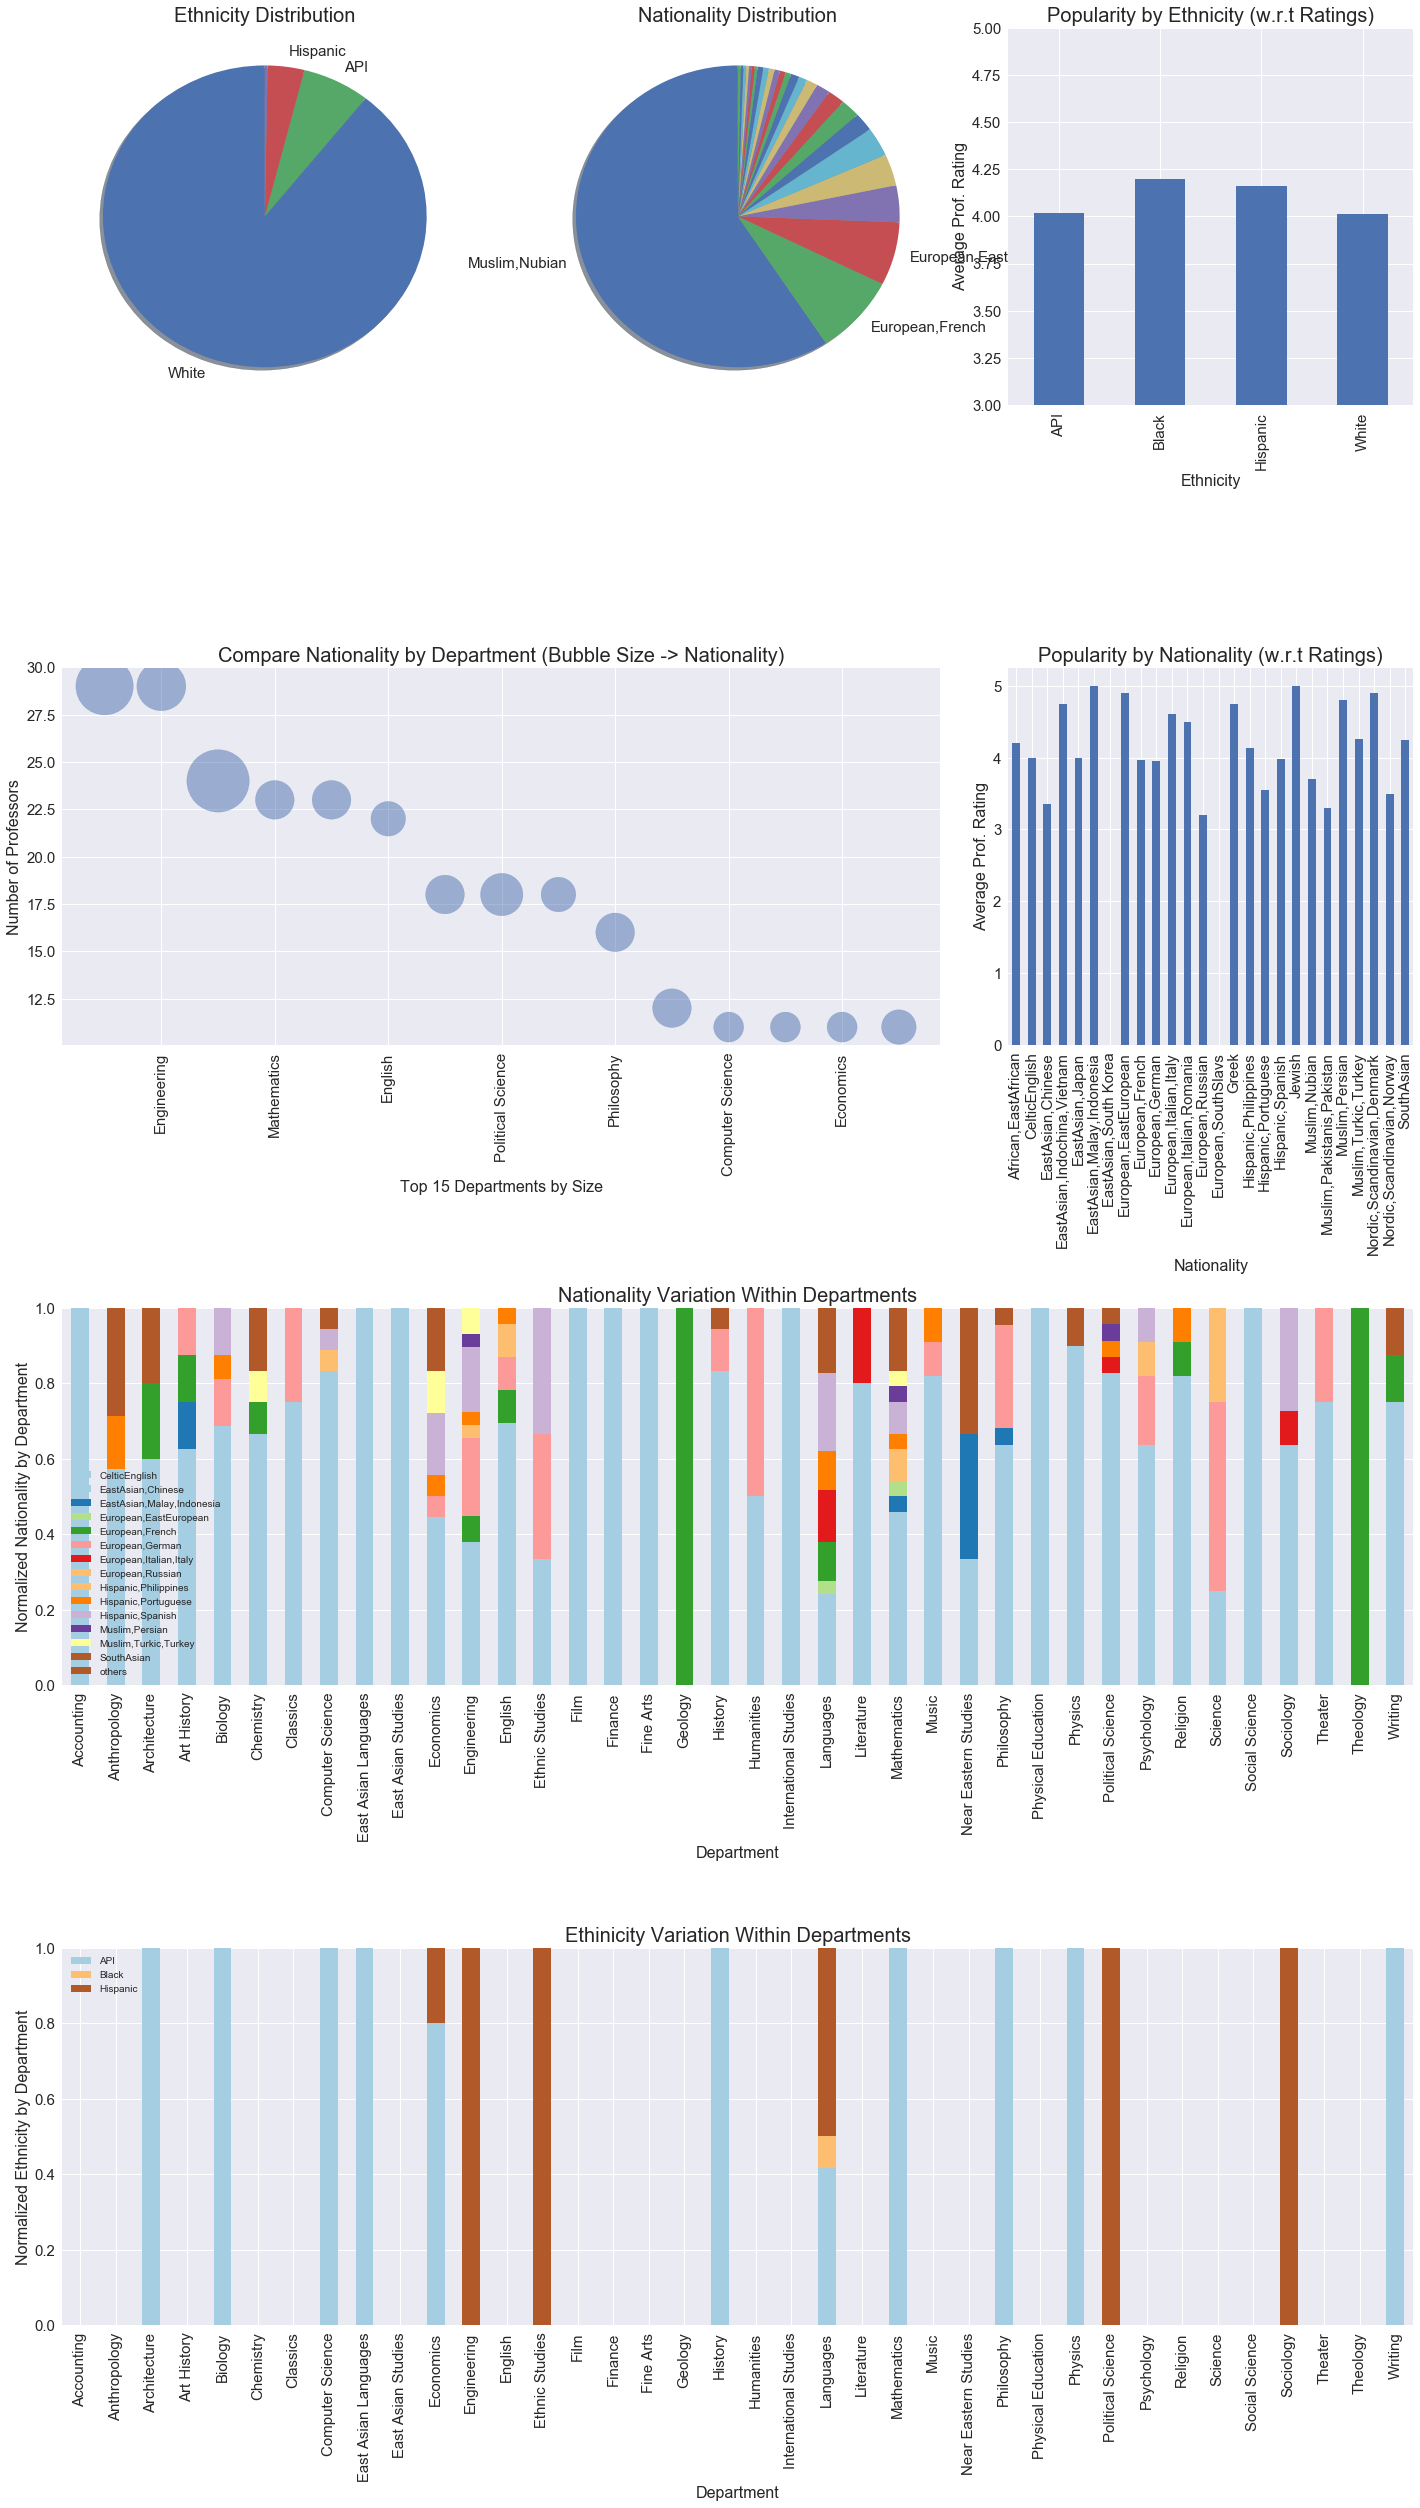

In [63]:
from matplotlib import pylab
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)


print("\t\t\t\t\t",uname)
print("----------------------------------------------------------------------------------------------------------------------")
print("Institution Rank: ",list(pu.institution_rank)[0],"\t\t\t\t\t","University Type: ",'Public' if (list(pu.public)[0] == 'True') else 'Private')
print("Number of Professors: ",pu.shape[0],"\t\t\t\t","Location: ",list(pu.states)[0])

print("Total Number of Ethnicities Found: ",pu.EthnicityLabel1.nunique(),"(Out of 5)","\t","Total Number of Nationalities Found: ",pu.NationalityLabel1.nunique(),"(Out of 38)")
print("Total Number of Departments: ",pu.tDept.nunique())

print("\n")


fig = plt.gcf()
fig.set_size_inches(20,35)

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))

ax4 = plt.subplot2grid((4, 3), (1, 0), colspan=2)
ax5 = plt.subplot2grid((4, 3), (1, 2))

ax6 = plt.subplot2grid((4, 3), (2, 0), colspan=3)
ax7 = plt.subplot2grid((4, 3), (3, 0), colspan=3)

#########################################################
    
labels1 = pu1.columns
fracs1 = pu1.iloc[0].values
explode1=(0, 0.05, 0, 0)

labels_l = [labels1[x] if (x < 3) else '' for x in range(len(labels1))]
ax1.pie(fracs1, labels=labels_l, shadow=True, startangle=90)
ax1.set_title("Ethnicity Distribution", fontsize= 20)

#########################################################

l = pu2.columns
sz = l.size
norm_l = l.value_counts().apply(lambda x: x/sz)
labels_l = norm_l.keys().tolist()
labels_l = [labels_l[x] if (x < 3) else '' for x in range(len(labels_l))]
fracs2 = pu2.iloc[0].values
explode2=(0, 0.05, 0, 0)

ax2.pie(fracs2, labels=labels_l, shadow=True, startangle=90)
ax2.set_title("Nationality Distribution", fontsize= 20)


#########################################################

y3 = list(pu3.overall_rating)
y33 = [incom for incom in y3 if str(incom) != 'nan']
low = min(y33)
high = max(y33)
ax3.set_ylim([math.floor(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
pu3.overall_rating.plot.bar(ax = ax3)
ax3.set_title("Popularity by Ethnicity (w.r.t Ratings)", fontsize= 20)
ax3.set_xlabel('Ethnicity', fontsize=16)
ax3.set_ylabel('Average Prof. Rating', fontsize=16)

#########################################################

x4 = list(range(1,16))
y4=list(pu4.faculty[:15])
size=300*(pu4.nationality_count[:15])
ax4.scatter(x4, y4, s=size, alpha=0.5)
ax4.set_xticklabels(list(pu4.dept[:15]), rotation='vertical')
ax4.set_title("Compare Nationality by Department (Bubble Size -> Nationality)", fontsize= 20)
ax4.set_xlabel('Top 15 Departments by Size', fontsize=16)
ax4.set_ylabel('Number of Professors', fontsize=16)
#########################################################


    
y4 = list(pu5.overall_rating)
y44 = [incom for incom in y4 if str(incom) != 'nan']
low = min(y44)
high = max(y44)
plt.ylim([math.floor(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
pu5.overall_rating.plot.bar(ax = ax5)
ax5.set_title("Popularity by Nationality (w.r.t Ratings)", fontsize= 20)
ax5.set_xlabel('Nationality', fontsize=16)
ax5.set_ylabel('Average Prof. Rating', fontsize=16)

#########################################################

ax6.set_ylim([0,1])
pu6.plot.bar(stacked=True, colormap='Paired', ax = ax6)
ax6.set_title("Nationality Variation Within Departments", fontsize= 20)
ax6.set_xlabel('Department', fontsize=16)
ax6.set_ylabel('Normalized Nationality by Department', fontsize=16)
ax6.legend(loc='lower left')

#########################################################

ax7.set_ylim([0,1])
pu7.plot.bar(stacked=True, colormap='Paired', ax = ax7)
ax7.set_title("Ethinicity Variation Within Departments", fontsize= 20)
ax7.set_xlabel('Department', fontsize=16)
ax7.set_ylabel('Normalized Ethnicity by Department', fontsize=16)

#########################################################
plt.tight_layout()
plt.show()